In [29]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')
import os
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import random

from src import setup

In [3]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [119]:
sx = DM.np.array([[0,1],[1,0]])
sx = DM.DensityMatrix(sx,DM.canonical_basis(1))
sy = np.array([[0,-1j],[1j,0]])
sy = DM.DensityMatrix(sy,DM.canonical_basis(1))
I = DM.Identity(DM.canonical_basis(1))
def S(i,j,n):
    res = DM.tensor([sx if index in[i,j] else I for index in range(n)])
    return res+DM.tensor([sy if index in[i,j] else I for index in range(n)])

In [120]:

def generate_random_pairs(n, m):
    if m < 2:
        raise ValueError("m should be at least 2")

    points = []
    
    while len(points) < n:
        x = random.randint(0, m-1)
        y = random.randint(0, m-1)
        if x != y:
            points.append((x, y))

    return points

def generate_all_pairs(m):
    pairs = []

    for i in range(m):
        for j in range(i + 1, m):
            pairs.append((i, j))

    return pairs

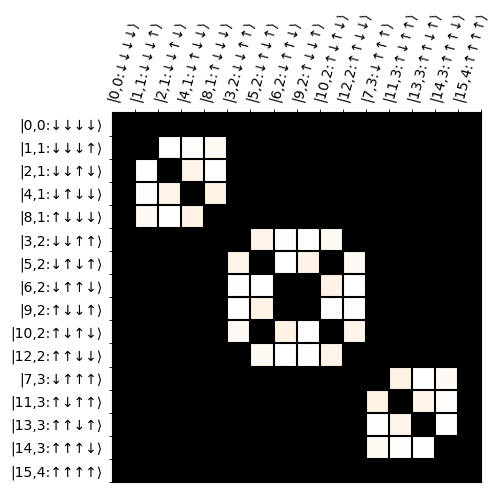

In [106]:
n_qbits = 4
n_interacting_pairs = 500
pairs = generate_random_pairs(n_interacting_pairs,n_qbits)
a = np.sum([S(p1,p2,n_qbits) for p1,p2 in pairs])


a.change_to_energy_basis()
a.plot()

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


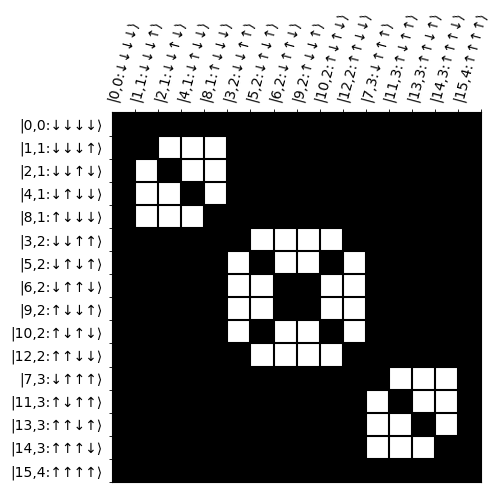

In [123]:
n_qbits = 4
pairs = generate_all_pairs(n_qbits)
print(pairs)
a = np.sum([S(p1,p2,n_qbits) for p1,p2 in pairs])

a.change_to_energy_basis()
a.plot()